<a href="https://colab.research.google.com/github/tvs-dk/data-analysis/blob/main/Cleaning_noisy_scatterplots_timestamps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convert timestamp to minutes and plot rolling average of data

This script imports all txt files in the current directory and converts data from the following format:

```
'%Y-%m-%d_%H-%M-%S' data data
```
to a dataframe where the time axis is in minutes, and only one of the data columns are used data[1] or data[2] (here, data[1]):
```
time   data[1]
0      data
1      data
2      data
```
It then calculates a rolling average (10 point) and mask all data points that are more than 10% below the rolling average.
* This is done because the lab scales often gives bad data points that have a lower value than the "real" data. 

## Data plot:
* The data from all txt files are plottet in a line plot (can be changed to scatterplot).
* The order of the legend can be changed in this line:
```python
legend_order = ['dataset1.txt', 'dataset2.txt', 'dataset3.txt', 'dataset4.txt']

```

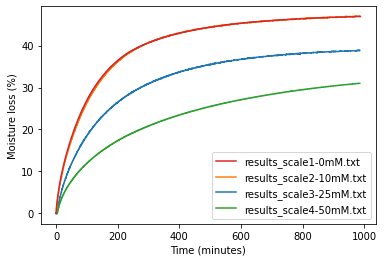

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


# Get all txt files in current directory
txt_files = glob.glob('*.txt')

# Define the order you want the datasets to appear in the legend
legend_order = ['results_scale1-0mM.txt', 'results_scale2-10mM.txt', 'results_scale3-25mM.txt', 'results_scale4-50mM.txt']

# Initialize plot
fig, ax = plt.subplots()

# Initialize dictionary to store lines and labels for legend
legend_lines = {}
legend_labels = {}

# Loop over txt files and plot each dataset
for file in txt_files:
    # Read in the data
    data = pd.read_csv(file, sep='\s+', header=None)

    # Convert first column to datetime and set as index
    data[0] = pd.to_datetime(data[0], format='%Y-%m-%d_%H-%M-%S')
    data.set_index(0, inplace=True)

    # Compute rolling average over 10 points
    rolling_avg = data.rolling(window=10).mean()

    # Mask any data point more than 10% below the rolling average
    mask = data < (0.9 * rolling_avg)
    data[mask] = np.nan

    # Convert time index to minutes
    data.index = (data.index - data.index[0]).total_seconds() / 60

    # Plot the data and store line and label for legend
    line, = ax.plot(data.index, data[2])
    label = file if file in legend_order else None
    legend_lines[file] = line
    legend_labels[file] = label


# Create legend in specified order
handles = [legend_lines[file] for file in legend_order]
labels = [legend_labels[file] for file in legend_order]
ax.legend(handles, labels)

# Set axis labels
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Moisture loss (%)')

# Show the plot
plt.show()


Below the script is modified to easier edit the legend

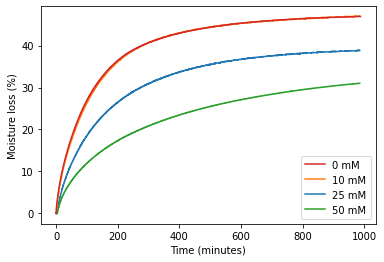

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


# Get all txt files in current directory
txt_files = glob.glob('*.txt')

# Define the order you want the datasets to appear in the legend
legend_order = ['results_scale1-0mM.txt', 'results_scale2-10mM.txt', 'results_scale3-25mM.txt', 'results_scale4-50mM.txt']

# Define the labels for each file
legend_labels = {'results_scale1-0mM.txt': '0 mM', 
                 'results_scale2-10mM.txt': '10 mM', 
                 'results_scale3-25mM.txt': '25 mM', 
                 'results_scale4-50mM.txt': '50 mM'}

# Initialize plot
fig, ax = plt.subplots()

# Initialize dictionary to store lines for legend
legend_lines = {}

# Loop over txt files and plot each dataset
for file in txt_files:
    # Read in the data
    data = pd.read_csv(file, sep='\s+', header=None)

    # Convert first column to datetime and set as index
    data[0] = pd.to_datetime(data[0], format='%Y-%m-%d_%H-%M-%S')
    data.set_index(0, inplace=True)

    # Compute rolling average over 10 points
    rolling_avg = data.rolling(window=10).mean()

    # Mask any data point more than 10% below the rolling average
    mask = data < (0.9 * rolling_avg)
    data[mask] = np.nan

    # Convert time index to minutes
    data.index = (data.index - data.index[0]).total_seconds() / 60

    # Plot the data and store line for legend
    line, = ax.plot(data.index, data[2])
    label = legend_labels.get(file, None) # Get the label for the file from the dictionary
    legend_lines[file] = line


# Create legend in specified order
handles = [legend_lines[file] for file in legend_order]
labels = [legend_labels.get(file, None) for file in legend_order]
ax.legend(handles, labels)

# Set axis labels
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Moisture loss (%)')

# Show the plot
plt.show()


# Working scatterplot

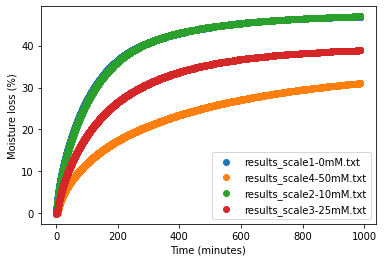

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


# Get all txt files in current directory
txt_files = glob.glob('*.txt')

# Initialize plot
fig, ax = plt.subplots()

# Loop over txt files and plot each dataset
for file in txt_files[::-1]: # reverse the order
    # Read in the data
    data = pd.read_csv(file, sep='\s+', header=None)

    # Convert first column to datetime and set as index
    data[0] = pd.to_datetime(data[0], format='%Y-%m-%d_%H-%M-%S')
    data.set_index(0, inplace=True)

    # Compute rolling average over 10 points
    rolling_avg = data.rolling(window=10).mean()

    # Mask any data point more than 10% below the rolling average
    mask = data < (0.9 * rolling_avg)
    data[mask] = np.nan

    # Convert time index to minutes
    data.index = (data.index - data.index[0]).total_seconds() / 60

    # Plot the data and add label for legend
    ax.scatter(data.index, data[2], label=file)

# Set axis labels and show legend
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Moisture loss (%)')
ax.legend()

# Show the plot
plt.show()


In [24]:
# Go to the output folder containing the output data
%cd /content/output/

import os
import pandas as pd

# Get all CSV files in current directory
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]

# Initialize empty DataFrame
df = pd.DataFrame()

# Loop through CSV files and append to DataFrame
for file in csv_files:
    # Read CSV file into DataFrame
    file_df = pd.read_csv(file, skiprows=[1], names=['x_'+file[1], 'y_'+file[1]))
    # Append to main DataFrame
    df = pd.concat([df, file_df], axis=1)

# Write combined DataFrame to CSV file
df.to_csv('pram.csv', index=False)

%cd /content/

SyntaxError: ignored